In [1]:
import numpy as np
import pandas as pd
import apmodule as ap
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Intro to scikit-learn
[Scikit-learn](https://scikit-learn.org/stable/) (or sklearn for brevity) is the premier machine learning python library. It is by far the most general and widely used. Other important libraries, more specialized and optimized for specific tasks are:
* [Tensorflow](https://www.tensorflow.org/), created by Google and designed to handle large scale deep learning.
* [Pytorch](https://pytorch.org/), created by Facebook and also specialized in deep learning.

The main advantage of sklearn is its **generality**: it covers basically every ML algorithm, and has **uniform strcuture** that makes learnign to use multiple algos very straightforward. It may not be super-optimized for large-scale tasks but this is not an issue for most users.

Here we will cover some **common basic functionality** of this package that can be applied to multiple algorithms.

I have built this notebook making shameless use of the great work of [Kevin Markham](https://www.dataschool.io/about/). You can find all his Jupyter Notebooks on this topic (together with great videos) [here](https://github.com/justmarkham/scikit-learn-videos). 
___

## 1. Loading a test Dataset
Here we will start by importing a standard dataset. Scikit learn has a collection of well-known public datasets that can be used to test our ML code. These are normally created by researchers and used to benchmark how well an algorithm works. They can be very sueful because we know the expected behavior of a caclulation and we can se if our code produces the expected result.

Here we will load the [iris dataset](http://archive.ics.uci.edu/ml/datasets/Iris). This is perhaps the best known database to be found in the pattern recognition literature. The data set contains **3 classes of 50 instances each**, where each class refers to a **type of iris plant**. For each observation we have four variables (**attributes or features** as they are called in machine learning):
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

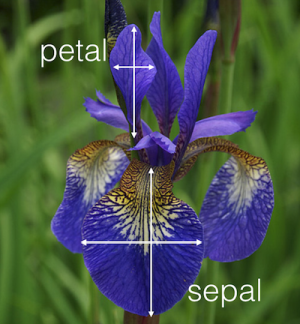

We also have a final field with the **correct classification** of each observation into one of three categories:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

This dataset has been built so that one class it's easy to distinguish from the other two, but the remaining two are very diffcult to predict:

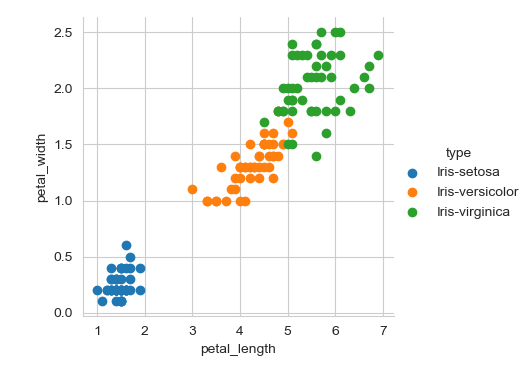

Here is a [complete list](https://scikit-learn.org/stable/datasets.html) of the available datasets.

Sklearn is a very large package. It is a common practice not to import the entire package but **specific modules** as they are needed. 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True) #The as_frame parameter loads the data in a pandas DataFrame
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris.target #this is the outcome variable

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

___

## 2. scikit-learn 4-step modeling pattern
For most ML algos, the workflow in scikit-learn involves four standard steps. The same process can be **applied to most existing** machine learning models. 
Many classification algorithms can be applied to this supervised learning problem on the iris dataset. In this code we will apply the KNN, or [K Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#classification), algorithm. In this classification algorithm the type of an observation **is determiend by looking at the type of the "closest neighbors"**. The idea is that if an unclassified obervation (a flower whose type we do not know) has features (petal length, etc...) very similar to a group of Iris Setosa (its closest neighbors are of this type) it's likely to be an Iris Setosa itself.

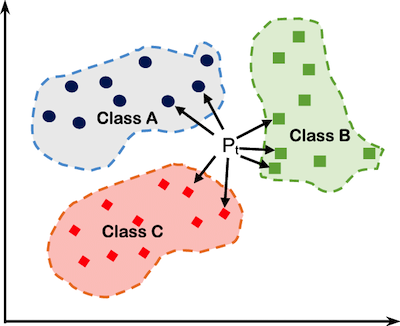

### Step 1 - Import the class you plan to use
As we said before, it is common practice not to import the entire sklearn library but only the specific module(s) we need to use. 

Every model has its own [page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) in the scikit-learn website. These are very useful to understand how the command works.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

### Step 2- Instantiate the estimator
**Estimator** is scikit-learn's term for predictive model and **instantiate** means to "make an instance of" this model. Basically we create an object with all the properties of the model. This model **requries the specification of a key parameter**, the number of closest neighbors.

In [5]:
knn = KNeighborsClassifier(n_neighbors=15)
print(knn)

KNeighborsClassifier(n_neighbors=15)


The **name of the object** does not matter, but is better to avoid generic names such as "model", in case we need to test multiple algos in the same notebook.

During the instantiation we can **specify tuning parameters** (aka "hyperparameters"). These are the parameters that specify **how the model is run**. In this case we need to specify the **number of neighbors** that the model will "look at" in order to infer the type of the unclassified observation. All parameters not specified are set to their **default values**.

### Step 3 - Fit the model with data (aka "model training")
We can now use the data to "train" the model. Basically we want the model to **learn the relationship** between X and y.

As we did for the linear regression, it is common to use the lable `X` for the features and the lable `y` for the outcome that we want to predict. Please notice that in sklearn we normally use the small-cap `y`.

Also we should notice that the **training happens inplace** we do not need to pass the result to a new object as we would have to do with other packages, for example with the linear regression in statsmodel where we would have to specify
```
reg = mod.fit()
```


In [6]:
X = iris.data
y = iris.target
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

#### Step 3.1 - Interpreting the results
The next optional step of the model is to obtain some sort of intuitive interpretation of the results. Basically, in this case, we would like to know how the two features (petal and sepal lenght) affect the prediction. This is not always possible, many ML models are effective **black boxes**: they provide a prediction but do not tell us why...

In this specific case we could show **how hypotetical observations** with different features **would be classified** by the model, and this would provide some intuition. The result would be a picture similar to the following picture

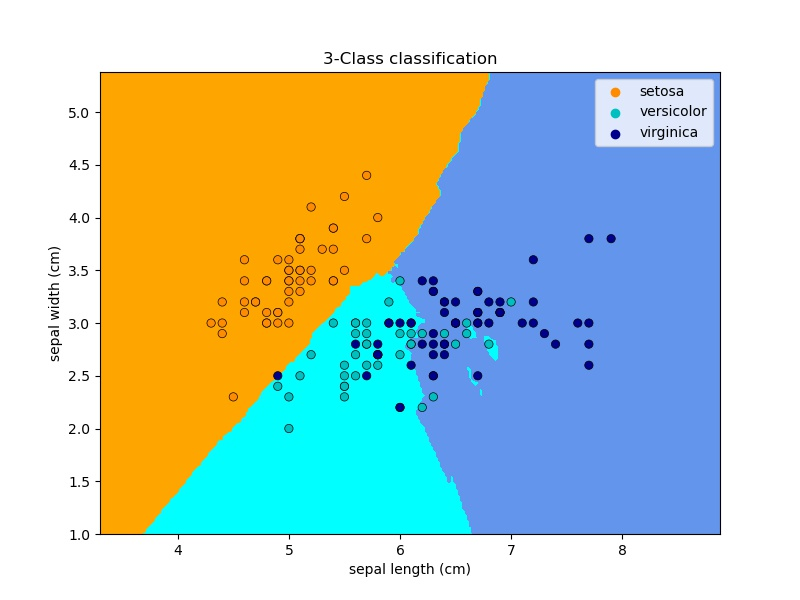

Generating this graph is quite complicated and since this is only an example based on a non-financial dataset we will not bother with it. If you are interested you can find the code [here](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html). 

Alas, estimation from ML algos are not alwais easy to interpet, this is why they are **called black-boxes**. Many times we will skip step 3.1 and go directly to step 4.

### Step 4 - Predict the response for a new observation
The reason why we train the algorithm is to be able to assign a "type" to **observations that have not be previously classified**. Assume that we encounter a flower and we measure the four features `[3, 5, 4, 2]`, we can use our trained module to predict to which category the flower belongs.

Since this new observation is outside the set of labelled observations used to train the model, we will call it an out-of-sample observation.

In [7]:
knn.predict([[3, 5, 4, 2]])

array([1])

In this case the model tells us that the **highest probability** is that this flower is a _versicolor_ type of iris. We can also ask to provide us with the probability for each type of flower.

In [8]:
knn.predict_proba([[3, 5, 4, 2]])

array([[0.        , 0.86666667, 0.13333333]])

And we see that the model is **quite confident about the prediction**. Predictions can be made for multiple observations at once:

In [9]:
X_new = [[3, 5, 4, 2], [1, 1, 3, 2]]
knn.predict(X_new)

array([1, 0])

## In summary
In summary, the workflow of the vast majority of algos in scikit-learn follows this same structure:
1. Import the class (model) we plan to use
2. Instantiate the estimator
3. Train the model 
4. Use the fitted model to make predictions

___

## 3. Model Validation
Before using a model to make prediction we will want to quantify its accuracy. I mean, as long as it's flowers and stuff...but when it comes to put moeny on the line in an investment strategy...

### 3.1 In-Sample Validation
The [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) method can also be used to measure the accuracy, in sample, of our model. We can simply apply predict to the observations that we used for training (and for which we know the "true" outcome) and we can compare the prediction with the actual type.

In [10]:
# store the predicted response values
y_pred = knn.predict(X)

We can now load the [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) module from scikit-learn that contains all the most commonly used metrics to measure the quality of a model. In this case we will use the very simple [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) that simply gives us the % of correct predictions.

In [11]:
from sklearn import metrics
metrics.accuracy_score(y, y_pred) #we compare the "right answer" with the prediction

0.9866666666666667

In this case we see that, in sample, our model has a very high accuracy! This is why we use a toy dataset... in finance if you find a model with this level of accuracy you are either wrong, or really, really, really rich.

### 3.2 Train-Test Split
Training and testing a model on the same set of data is a bad idea. We know that **we run the risk to over-fit the model**, basically to optimize the model to produce very accurate prediction on our training set of data, but without any predcitive power outside it.

To avoid this we can split our sample in two and use:
- The first part to train the model (the **Training Set**)
- The second part to test the model (the **Test Set**)

We could do this manually, or we can use the [`test_train_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) functionality from the [model selection](https://scikit-learn.org/stable/model_selection.html) component of sklearn.

Our data has 150 observations, so we can reserve 40% for testing:

In [12]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

Now the training part of our dataset has 90 observations

In [14]:
print(X_train.shape)
print(y_train.shape)

(90, 4)
(90,)


And the testing component has 60 observations

In [15]:
print(X_test.shape)
print(y_test.shape)

(60, 4)
(60,)


We can now train the model on the **training set** and make our predictions on the **test set**

In [16]:
# We train the model on the training set
knn.fit(X_train, y_train)

# We make predictions on the testing set
y_pred = knn.predict(X_test)

# We compare actual response values (y_test) with predicted response values (y_pred)
metrics.accuracy_score(y_test, y_pred)

0.9833333333333333

As expected the **out-of-sample accuracy is lower**. This is not a big deal in this case because the accuracy is still exceptionally good.

___
**ATTENTION:** the automatic train-test split is very useful and heavily used in machine learning. In finance application we we need to make a judgement call whether this technique is appropriate for our specific application. The issue is that the split, here, is random. **Our data has a temporal structure**, so it seems not reasonable to test an algorithm on an observation that happened, in time, **before the observation used to train the model**. 

This is not a problem of logic or coherence (if we can make money we would gladly give those up) but of **feasibility of the strategy**. When we move the algorithm into production (i.e. when we start to invest for real based on its predictions) we will only be able to invest in the future (from tomorrow) using a model trained on past data (up to yesterday), so validating the model with a different structure could lead to overestimating predictability.

In finance application we still use the train-test-split, but we do the split manually based on dates: _we use data from 1990 to 2015 to train the model and data from 2106 to 2019 to test it_. 
___

### 3.3 K-Folds Cross-Validation
A possible issue with the train-test split is that our estimation of the out-of sample accuracy may change significantly based on the specific split. In other words we do not know if the predictive power of the model is constant across the entire databse. With [K-Folds Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html) we try to avoid this problem by splitting our sample into $K$ parts,aslko called _folds_ and **repeating the estimation of the model $K$ times**. In every iteration we will use a different fold for the validation and train the model on the remaining $K-1$ folds. The final performance of the model will be the average performance across iterations.

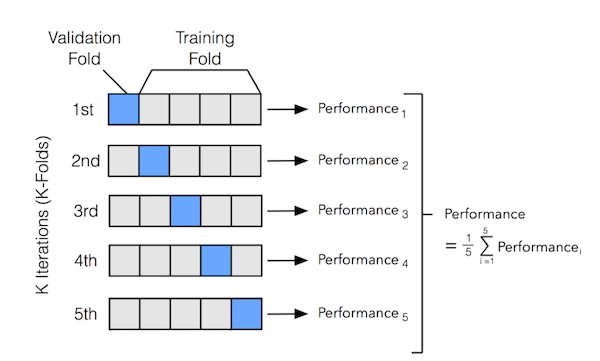

#### 3.31 Building the Folds
Let's start by looking at the sci-kit learn code to **create the folds**. To vidualize the problem let's create an even smaller dataset with only 10 observations:

In [17]:
# this creates a fake dataset with two features
X_new = pd.DataFrame(np.random.normal(0,1,[10,2]), columns=['x1', 'x2'])
X_new

,x1,x2
0,-0.997922,0.254564
1,-0.594081,0.189040
2,-1.243036,0.183448
3,-0.234076,-1.130119
4,-1.226631,1.321945
5,1.121836,0.476223
6,0.368383,-0.005865
7,1.418470,-0.352584
8,0.657327,-2.591322
9,-0.433961,1.051879


In [18]:
# this creates a fake dataset with a binary outcome variable
y_new=pd.DataFrame(np.array((0, 0, 1, 1, 1, 0, 0, 0, 1, 1)), columns=['y'])
y_new

,y
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


Now let's use the [k-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to **split the dataset into 5 folds** ready for train-test iterations:

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5) # we instantiate the split indicating the number of iterations

new_split = kf.split(X_new) # we apply the plit to our dataset

The split has generated a list of indices of **which observations are in train/test sets in each iteration**. Let's printe them just to understand whta is the result:

In [20]:
for train_index, test_index in new_split:
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [2 3 4 5 6 7 8 9] TEST: [0 1]
TRAIN: [0 1 4 5 6 7 8 9] TEST: [2 3]
TRAIN: [0 1 2 3 6 7 8 9] TEST: [4 5]
TRAIN: [0 1 2 3 4 5 8 9] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]


So, for example, in the first interation, observations 0 and 1 will be used as the out-of-sampel test while the model will be **trained on observations 2-9**. 

We should notice a possible problem here: in the first iteration, the test set contains obsevations 0 and 1, in both these instances, the outcome variable in our fake dataset has value 0. This means that one of the outcome classes **is not represented in the test set**. This may be a problem for some applications. Of course, the extreme result of no represetnation is a feature of our stupid toy dataset. In a real dataset, what can happen, is that the different classes of outcome **may be under- or over-represented** in a given iteration. This could lead to choose a model that is not very good at indentifying one specific outcome class.

To avoid this problem we can use a [strateified K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) split where in every iteration the test sample contain a proper representation of each outcome class. 

In [21]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5) # we instantiate the split indicating the number of iterations

strat_split = skf.split(X_new, y_new) # notice that we need to pass the outcoem variable for the stratification

for train_index, test_index in strat_split:
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 4 5 6 7 8 9] TEST: [0 2]
TRAIN: [0 2 4 5 6 7 8 9] TEST: [1 3]
TRAIN: [0 1 2 3 6 7 8 9] TEST: [4 5]
TRAIN: [0 1 2 3 4 5 7 9] TEST: [6 8]
TRAIN: [0 1 2 3 4 5 6 8] TEST: [7 9]


#### 3.32 Evaluating the Model
Sci-kit learn has a number of functions that [authomatically run the cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) and provide us with the accuracy measure of our choice. The k-fold generation **is run in the background** for us.

Let's go back to our logistic regression for the prediction of the iris type. We recorded a `0.96` in-sample prediction accuracy and a `0.9333` out-of-sample accuracy in a simple train-test-split. Let's now **estimate average accuracy using a k-fold validation** using the [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function.

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=10)
scores

array([0.93333333, 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

Lt's put the output **in a DataFrame** for ease of use

In [23]:
accuracy = pd.DataFrame(scores, columns=['Accuracy'])
accuracy

,Accuracy
0,0.933333
1,0.933333
2,1.000000
3,1.000000
4,1.000000
5,0.933333
6,0.933333
7,1.000000
8,1.000000
9,1.000000


Let's have a look at some **descriptive statistics**.

In [24]:
accuracy.describe()

,Accuracy
count,10.000000
mean,0.973333
std,0.034427
min,0.933333
25%,0.933333
50%,1.000000
75%,1.000000
max,1.000000


As we can see, the average out-of-sample accuracy is `0.973`, not far away from the in-sample accuracy we measured before. Our train-test-split model led to an underestimation of the accuracy, likely due to the **uneven performance of the model across our sample**.

___
## 4. Hypterparameter Tuning
When we instantiated the KNN model we had to **specify the value of a key parameter** (or hyprerparameter, a prameter that specifies how the model is run), the number of neighbors `n_neighbors`. We have so far used 10 (5 is the default value in sci-kit learn).

A fundamental step in machinle learning is **finding the optimal value for this hyperparameter**. This is called _hypterparameter tuning_ and is often the most complicated part of the model development process. 

In this case the tuning is rather simple because we only have one paraemter and the run time of our estimation is very short. So let's find the optimal value for `n_neighbors` by running a loop for all the values from 1 to 25. I nevery iteration we have to:
1. Instantiate the KNN model with a different value for `n_neighbors`
2. Run the 10-fold cross-validation
3. Save the averge accuracy

At the end, we can plot the accuracy as a function of `n_neighbors`

In [25]:
# we create an empty DataFrame to store the results
optimal = pd.DataFrame(columns=['N. of Neighbors', 'Accuracy']) 

# we start the loop
for k in range(1,26):
    # we instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # we run the 10-fold cross validation
    kscores = cross_val_score(knn, X, y, cv=10)       
    
    # we save the average accuracy (and the number of eighbors)
    optimal = optimal.append({'N. of Neighbors':k, 'Accuracy': kscores.mean()}, 
                             ignore_index=True)

# we index the frame by the number of neighbors
optimal = optimal.set_index('N. of Neighbors')

optimal.head()

,Accuracy
N. of Neighbors,
1.0,0.960000
2.0,0.953333
3.0,0.966667
4.0,0.966667
5.0,0.966667


We can likely get a better view by plotting the results.

<AxesSubplot:title={'center':'Hyperparameter Tuning'}, xlabel='Number of Closest Neighbors (K)', ylabel='10-Folds Average Out-of-Sample Accuracy'>

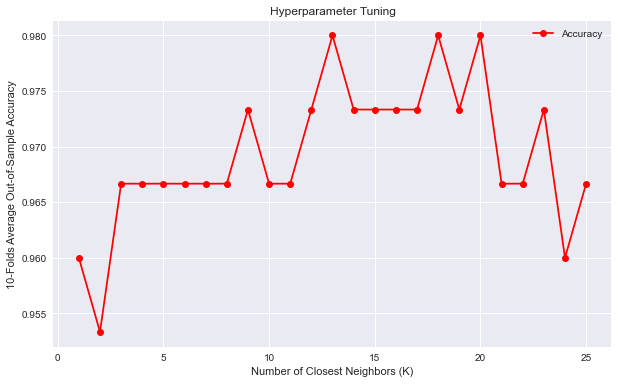

In [26]:
optimal.plot(figsize=(10,6), 
             style='r-o',
             xlabel='Number of Closest Neighbors (K)',
             ylabel='10-Folds Average Out-of-Sample Accuracy',
             title='Hyperparameter Tuning')

___
### Exercise 12.1
Enough with this flower stuff! Now that we understand how the machine learning models work in sci-kit learn, let's move back to our financial data. The file `ml_data.zip` has an already prepared dataset where we have four of our information signals (Gross Profitability, quarterly E/P, 12-months Momentum and Beta) at the end of december of every year and an outcome variable (`group`) that tells us whether in the next year the company was in the top (`3`), middle (`2`) or bottom (`1`) third of the market in terms of total return.

#### Step 1. Let's import the data
Import the content of the file into a DataFrame called `data`. This should be indexed by `id` and `date` as usual. We can the:
1. Create our `X` and `y` objects. The former will contain the "features" of our model (teh four information signals) and the latter wil lcontain the outcome variable (`group`). 
1. Use the [**`train_test_split()`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split our `X` and `y` into train and test components (we can reserve 40% of the sample for testing)

In [27]:
#We load the data
data = pd.read_csv('ml_data.zip', parse_dates=['date']).set_index(['id','date'])
data.head()

gp     mom12       epq    n_beta  group
id    date                                                     
10001 1996-12-31 -1.259027 -0.242734 -0.338697  2.258646      2
      1997-12-31 -1.129937 -0.337797 -0.093260  2.191831      3
      1999-12-31 -1.046053 -0.242728 -0.077289  1.984459      3
      2000-12-29 -0.744051  0.477012  0.152463  1.906436      2
      2001-12-31 -0.799419  0.313496  0.174256  1.760543      1

In [28]:
# We define our features and outcome variable
X = data[['gp', 'mom12', 'epq', 'n_beta']]
y = data['group']

#We split the sample 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

#### Step 2. Let's instantiate the model
Now that our sample is ready we can **instantiate a K-Neighbors Classifier** model with n=25

In [29]:
knn = KNeighborsClassifier(n_neighbors=25)

#### Step 3. Let's train the model
To start, lets train the model **on the training sample** `(X_train, y_train)`. This will allow us to measure the accuracy of our predictions out-of-sample

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

#### Step 4. Let's make our predictions
Let's now make our **out-of-sample predictions** by predicting the outcome given the input features `X_test`. Let's store our predictions in an object called `y_pred`. We can then compare these predictions against the real performance of the stock (`y_test`) and measure the out-of-sample accuracy of the model

In [31]:
# We make predictions on the testing set
y_pred = knn.predict(X_test)

# We compare actual response values (y_test) with predicted response values (y_pred)
metrics.accuracy_score(y_test, y_pred)

0.3848333275035853

If everything went according to plan you should have achieved an accuracy of around 38.5%. **Is this any good?** Well, since our outcome has 3 possible classess, a random prediction would achieve a 33% accuracy, so our model has real predicitve power. As we will see next week, in financial applications, even few % points better than a random prediction can be quite profitable. 

#### Step 5: Hypterparameter Tuning
Let's now find the **optimal value for the hyperparameter** of our model. The optimal number of neighbors is usually a fucntion of the sample size. Our dataset is significantly bigger than the iris one, so we will test values of `n` between 25 and 250 (with increments of 25 to keep things moving). The loop is very similar to the one used above, with the only difference that if we want to move with increments of 25 we need to write:
```python
for k in range(25,275,25):

```

After the loop you can plot the result as we did in the main text.

<AxesSubplot:title={'center':'Hyperparameter Tuning'}, xlabel='Number of Closest Neighbors (K)', ylabel='10-Folds Average Out-of-Sample Accuracy'>

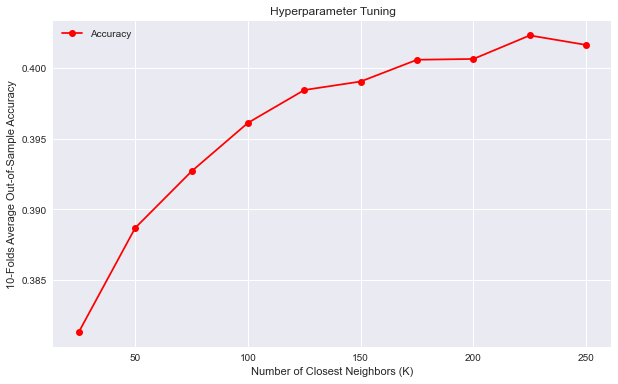

In [32]:
# we create an empty DataFrame to store the results
optimal = pd.DataFrame(columns=['N. of Neighbors', 'Accuracy']) 

# we start the loop
for k in range(25,275,25):
    # we instantiate the classifier
    knn2 = KNeighborsClassifier(n_neighbors=k)
    
    # we run the 10-fold cross validation
    kscores = cross_val_score(knn2, X, y, cv=10)       
    
    # we save the average accuracy (and the number of eighbors)
    optimal = optimal.append({'N. of Neighbors':k, 'Accuracy': kscores.mean()}, 
                             ignore_index=True)

# we index the frame by the number of neighbors
optimal = optimal.set_index('N. of Neighbors')

optimal.plot(figsize=(10,6), 
             style='r-o',
             xlabel='Number of Closest Neighbors (K)',
             ylabel='10-Folds Average Out-of-Sample Accuracy',
             title='Hyperparameter Tuning')

And you should observe an increase in prediction accuracy above 40%, for values of `n` close to 200. Not bad.